### 목표
- 학습된 모델을 서비스화 시키는 도구로 flask를 사용해보자.

In [1]:
# 이미지를 데이터화할때 사용하기 위해 opencv 설치
!pip install opencv-python

In [2]:
# 분석용 서버 구축을 위한 flask 설치
!pip install flask

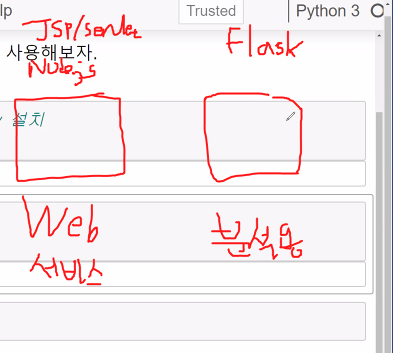

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
127.0.0.1 - - [11/Dec/2021 11:03:07] "GET / HTTP/1.1" 200 -
<ipython-input-27-6208d9bc5263>:29: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  data = np.fromstring(in_memory_file.getvalue(), dtype=np.uint8) # numpy 타입으로 데이터 읽기


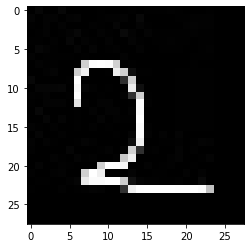

(28, 28)

array([[  0,   6,   0,   0,   7,   0,   0,   0,   0,   1,   0,   0,   0,
          1,   0,   1,   1,   1,   2,   1,   0,   0,   0,   1,   0,   0,
          0,   0],
       [  4,   0,   3,   3,   0,   3,   4,   0,   0,   1,   2,   2,   3,
          0,   8,   0,   0,   0,   0,   1,   1,   2,   2,   2,   0,   0,
          0,   0],
       [  1,   0,   3,   0,   3,   0,   0,   0,   2,   1,   0,   5,   0,
          0,   4,   1,   0,   0,   0,   0,   2,   3,   2,   2,   0,   0,
          0,   0],
       [  0,   1,   3,   0,   1,   3,   7,   1,   0,   3,   1,   0,   9,
          3,   0,   4,   1,   1,   1,   1,   1,   2,   1,   1,   0,   0,
          0,   0],
       [  1,   1,   0,   2,   0,   6,   0,   3,   1,   0,   3,   0,   0,
          4,   1,   0,   1,   1,   2,   1,   1,   0,   1,   1,   0,   0,
          0,   0],
       [  0,   6,   3,   1,   0,   0,   4,   0,   4,   0,   1,   2,   0,
          0,   3,   0,   0,   1,   1,   1,   0,   0,   1,   2,   0,   0,
          0,   0],
       [  

(1, 784)

array([[0.00000000e+00, 6.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        7.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 3.93700787e-03, 0.00000000e+00, 1.11111111e-01,
        1.00000000e+00, 1.00000000e+00, 2.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        4.00000000e+00, 0.00000000e+00, 3.00000000e+00, 3.00000000e+00,
        0.00000000e+00, 6.38297872e-02, 2.54777070e-02, 0.00000000e+00,
        0.00000000e+00, 4.11522634e-03, 7.84313725e-03, 7.84313725e-03,
        1.18110236e-02, 0.00000000e+00, 3.13725490e-02, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 3.93700787e-03,
        4.40528634e-03, 7.84313725e-03, 1.08695652e-02, 1.33333333e-01,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.000000

array([1], dtype=int64)

127.0.0.1 - - [11/Dec/2021 11:03:12] "POST /fileUpload HTTP/1.1" 200 -
<ipython-input-27-6208d9bc5263>:29: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  data = np.fromstring(in_memory_file.getvalue(), dtype=np.uint8) # numpy 타입으로 데이터 읽기


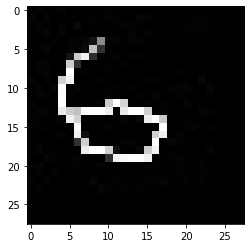

(28, 28)

array([[  0,   3,   0,   2,   4,   0,   0,   1,   0,   0,   2,   0,   1,
          2,   0,   0,   1,   1,   2,   1,   0,   0,   0,   1,   0,   0,
          0,   0],
       [  4,   0,   5,   0,   0,   0,   0,   1,   2,   0,   4,   2,   0,
          0,   5,   3,   0,   0,   0,   1,   1,   2,   2,   2,   0,   0,
          0,   0],
       [  1,   3,   1,   0,   3,   0,   9,   0,   1,   0,   0,   1,   4,
          3,   1,   0,   0,   0,   0,   0,   2,   3,   2,   2,   0,   0,
          0,   0],
       [  0,   2,   5,   0,   4,   0,   0,   0,   0,   1,   2,   0,   0,
          4,   0,   3,   1,   1,   1,   1,   1,   2,   1,   1,   0,   0,
          0,   0],
       [  1,   0,   0,   2,   0,   3,   2,   5,  19, 138,   3,   5,   0,
          5,   3,   0,   1,   1,   2,   1,   1,   0,   1,   1,   0,   0,
          0,   0],
       [  0,   3,   7,   0,   0,   2,   1,  11, 193,  49,   2,   0,   1,
          0,   0,   0,   0,   1,   1,   1,   0,   0,   1,   2,   0,   0,
          0,   0],
       [  

(1, 784)

array([[0.00000000e+00, 3.00000000e+00, 0.00000000e+00, 2.00000000e+00,
        4.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 2.00000000e+00, 0.00000000e+00,
        8.62068966e-03, 7.87401575e-03, 0.00000000e+00, 0.00000000e+00,
        1.00000000e+00, 1.00000000e+00, 2.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        4.00000000e+00, 0.00000000e+00, 5.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 3.93700787e-03,
        7.84313725e-03, 0.00000000e+00, 1.56862745e-02, 7.84313725e-03,
        0.00000000e+00, 0.00000000e+00, 1.96078431e-02, 1.17647059e-02,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 3.93700787e-03,
        4.40528634e-03, 7.84313725e-03, 1.08695652e-02, 1.33333333e-01,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.000000

array([4], dtype=int64)

127.0.0.1 - - [11/Dec/2021 11:03:22] "POST /fileUpload HTTP/1.1" 200 -
<ipython-input-27-6208d9bc5263>:29: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  data = np.fromstring(in_memory_file.getvalue(), dtype=np.uint8) # numpy 타입으로 데이터 읽기


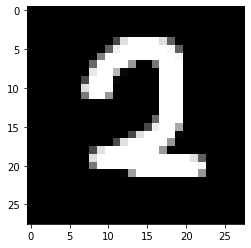

(28, 28)

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  72, 223,
        255, 255, 255, 255, 223,  96,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  96, 239, 255,
        255, 255, 255, 255, 255, 247,  96,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

(1, 784)

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.  

array([2], dtype=int64)

127.0.0.1 - - [11/Dec/2021 11:07:08] "POST /fileUpload HTTP/1.1" 200 -
<ipython-input-27-6208d9bc5263>:29: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  data = np.fromstring(in_memory_file.getvalue(), dtype=np.uint8) # numpy 타입으로 데이터 읽기


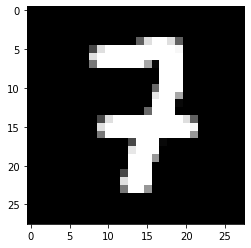

(28, 28)

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  96, 223, 255, 255, 223,  96,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  72, 223, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 247,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

(1, 784)

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.  

array([3], dtype=int64)

127.0.0.1 - - [11/Dec/2021 11:07:55] "POST /fileUpload HTTP/1.1" 200 -
<ipython-input-27-6208d9bc5263>:29: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  data = np.fromstring(in_memory_file.getvalue(), dtype=np.uint8) # numpy 타입으로 데이터 읽기


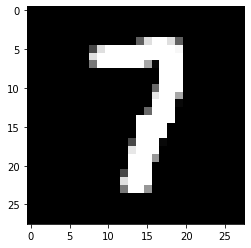

(28, 28)

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  96, 223, 255, 255, 223,  96,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  72, 223, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 247,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

(1, 784)

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.  

array([3], dtype=int64)

127.0.0.1 - - [11/Dec/2021 11:08:16] "POST /fileUpload HTTP/1.1" 200 -
<ipython-input-27-6208d9bc5263>:29: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  data = np.fromstring(in_memory_file.getvalue(), dtype=np.uint8) # numpy 타입으로 데이터 읽기


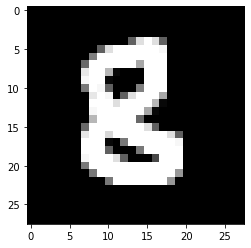

(28, 28)

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         96, 223, 255, 223,  96,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  96, 223, 255, 255,
        255, 255, 255, 255, 247,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

(1, 784)

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.  

array([8], dtype=int64)

127.0.0.1 - - [11/Dec/2021 11:08:55] "POST /fileUpload HTTP/1.1" 200 -


In [27]:
from flask import Flask, render_template, request
import cv2
import io
import numpy as np
import matplotlib.pyplot as plt
import pickle

app = Flask(__name__)
# 모델 로딩
with open('hand_digit_model.pkl','rb') as f :
    logi_model = pickle.load(f)

# 스케일러 로딩
with open('hand_digit_min_max_scaler.pkl','rb') as f:
    min_max_scaler = pickle.load(f)


# 사용자 요청을 받기 위한 라우터 설정
@app.route('/')
def index():
    return render_template('upload.html')

@app.route('/fileUpload', methods=['GET','POST'])
def fileUpload():
    if request.method == 'POST': # 요청이 POST 방식일때
        f = request.files['file'] # 요청 객체에서 file 이름을 가진 데이터를 꺼내오기
        in_memory_file = io.BytesIO() # byre 단위로 파일을 읽기 위한 객체
        f.save(in_memory_file) # byte단위 파일로 저장
        data = np.fromstring(in_memory_file.getvalue(), dtype=np.uint8) # numpy 타입으로 데이터 읽기
        
#         # 이미지가 color일 경우
#         color_image_flag = 1
#         img = cv2.imdecode(data,color_image_flag) # opencv 활용해서 이미지 데이터로 변경
#         img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # BGR색상에서 RGB색상으로 변경
        
        
        # 이미지가 grayscale 일 경우
        img = cv2.imdecode(data,cv2.IMREAD_GRAYSCALE)
    
        display(plt.imshow(img, cmap='gray')) # 이미지 그리기
        plt.show() # 이미지 보이기
        
        # 모델 예측
        display(img.shape) # 사진 shape 확인
        display(np.array(img)) # 사진 데이터 숫자 값 확인
        np_img=np.array(img).reshape(1,-1) # 흑백처리된 사진을 numpy 타입으로 변경, 사진을 1차원으로 펼치기
        display(np_img.shape)
        np_img_scaled = min_max_scaler.transform(np_img)# 스케일링
        display(np_img_scaled) # 스케일링 결과 확인
        pre = logi_model.predict(np_img_scaled) # 손글씨 숫자 예측
        display(pre)
        
    return "당신이 전송한 숫자는 {}입니다".format(pre[0])

app.run() # 서버구동